In [1]:
#Preliminaries

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import os
print(os.listdir('data/walmart'))

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']


## Train Dataset

In [2]:
#View the Dataset
df = pd.read_csv('data/walmart/train.csv')
display(df.head())
print("Size of the Train Dataset: ", df.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Size of the Train Dataset:  (421570, 5)


## Feature Dataset

In [3]:
features = pd.read_csv('data/walmart/features.csv').drop(columns=['IsHoliday'])
display(features.tail())
print("Size of the Features Dataset: ", features.shape)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


Size of the Features Dataset:  (8190, 11)


## Stores Dataset

In [4]:
stores = pd.read_csv('data/walmart/stores.csv')
display(stores.head())
print("Size of the Features Dataset: ", stores.shape)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Size of the Features Dataset:  (45, 3)


## Combine Datasets

In [5]:
dataset = df.merge(stores, how='left').merge(features, how='left')
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


## Review entire Dataset

In [6]:
import sweetviz as sv

#Analyze the dataset
# dataset_report = sv.analyze(dataset)

#display the report
# dataset_report.show_html("retailDataset.html")

## Time Series Plot of Weekly Sales with Features

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce',format = '%Y-%m-%d') #the problem with not coercing errors is that the series will not be converted to a datetime object

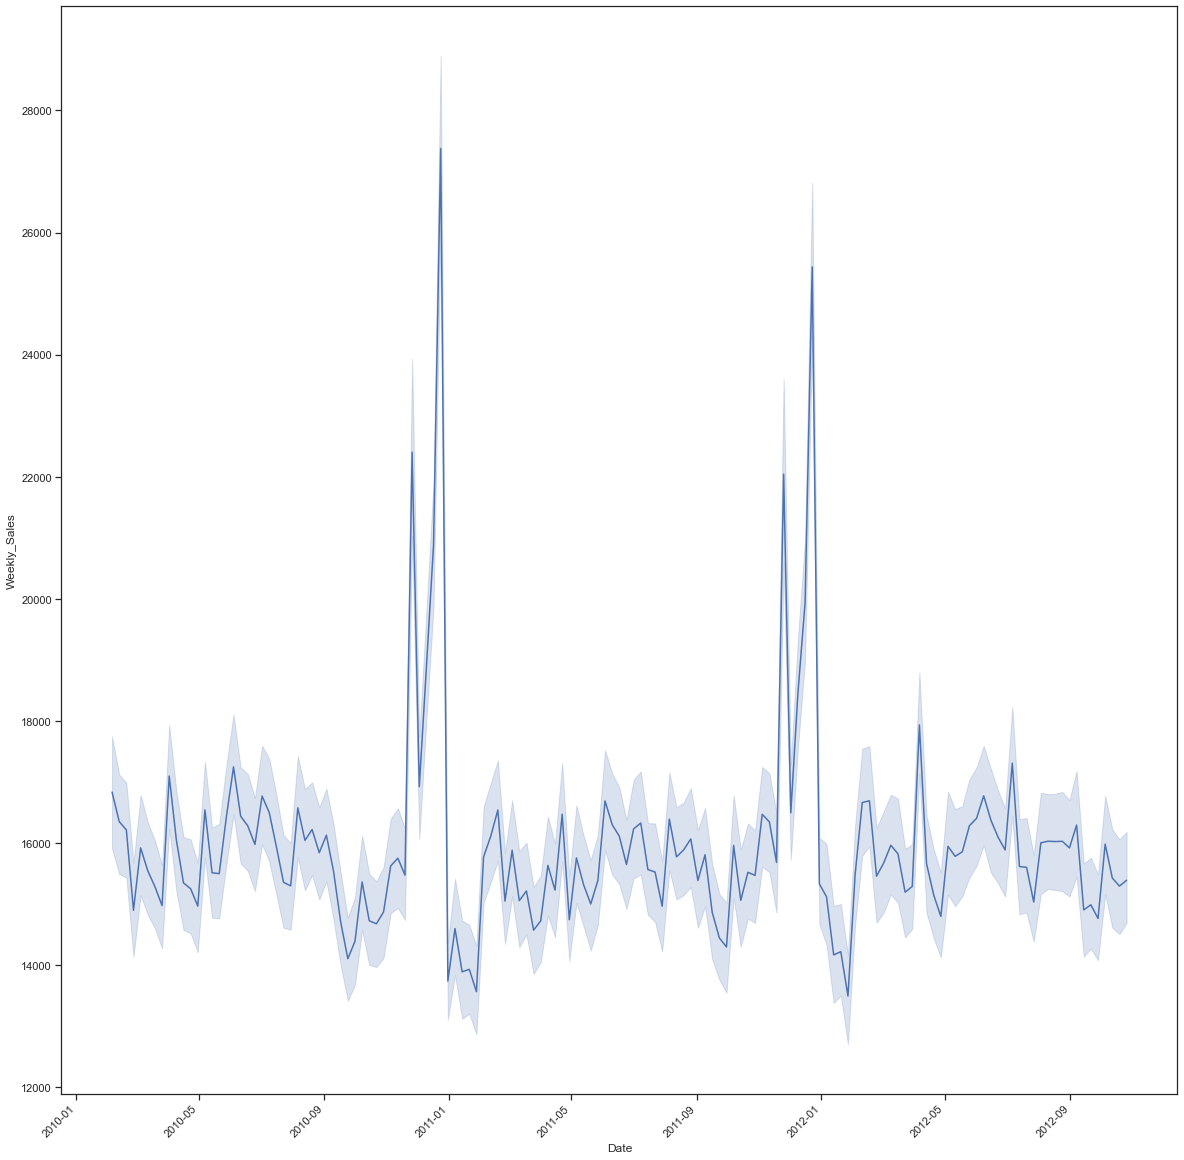

In [8]:
plt.figure(figsize=(20,20))
line = sns.lineplot(x="Date", y="Weekly_Sales", data=dataset)
plt.draw()
line.set_xticklabels(line.get_xticklabels(), rotation=45, horizontalalignment='right');


In [9]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


### Aggregate it by Month (Mean)

In [10]:
sales = dataset[['Date',"Weekly_Sales"]]

sales_agg = sales.groupby([sales['Date'].dt.year.rename("year"), sales['Date'].dt.month.rename("month")]).agg('sum')

#You cannot reset the index yet as you will use it to create an index
# sales_agg["month_year"] = str(sales_agg.index.get_level_values(0)) + '-' + str(sales_agg.index.get_level_values(1))

# #Reset Index To Remove Multi-Level Index
sales_agg = sales_agg.reset_index()

#Create new column to combine Year-Year
sales_agg["year-month"] = [str(x)+"-"+str(y) for x,y in zip(sales_agg.year,sales_agg.month)]
sales_agg["year-month"] =pd.to_datetime(sales_agg["year-month"], format='%Y-%m').apply(lambda x: x.strftime('%Y-%m'))

#for plotting, make the new-column as the new index
sales_agg = sales_agg.set_index("year-month", drop=True)
sales_agg

,year,month,Weekly_Sales
year-month,,,
2010-02,2010,2,1.903330e+08
2010-03,2010,3,1.819198e+08
2010-04,2010,4,2.314124e+08
2010-05,2010,5,1.867109e+08
2010-06,2010,6,1.922462e+08
2010-07,2010,7,2.325801e+08
2010-08,2010,8,1.876401e+08
2010-09,2010,9,1.772679e+08
2010-10,2010,10,2.171618e+08


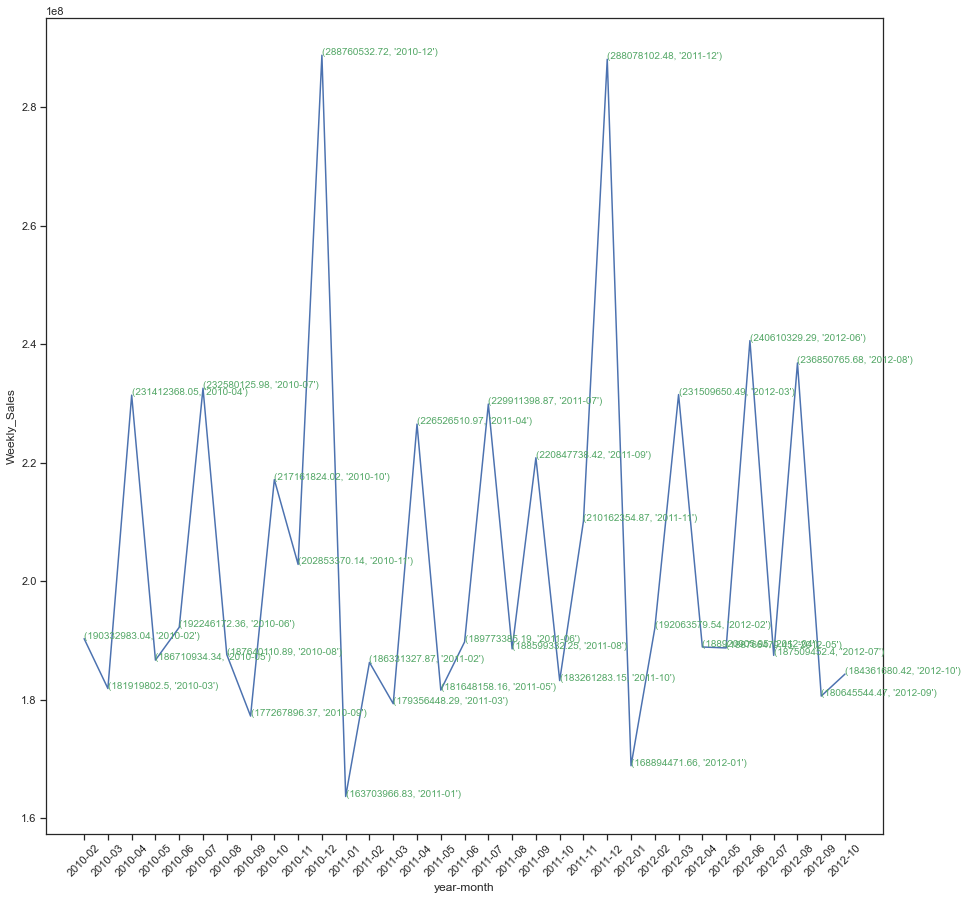

In [11]:
plt.figure(figsize=(15,15))
sns.lineplot(x=sales_agg.index, y="Weekly_Sales", data=sales_agg)
plt.xticks(rotation=45);

#Label the plot
# for i in range(sales_agg.shape[0]):
#     plt.text(sales_agg.index, 
#              sales_agg["Weekly_Sales"],
#              agg_dataset[].iloc[i])
[plt.text(p[0], p[1], (round(p[1],2), p[0]), color='g', size='small') for p in zip(sales_agg.index, sales_agg['Weekly_Sales'])];

# plt.show()

### Clearly, the time series is too large to display the tick marks, we need to aggregate by month

## Exploratory Data Analysis

In [12]:
#Since Weekly Sales is the point of the exercise, variables should be scatter plotted against it.
def scatter(column):
    plt.figure()
    plt.scatter(dataset[column], dataset["Weekly_Sales"])
    plt.ylabel("Weekly Sales")
    plt.xlabel(column)

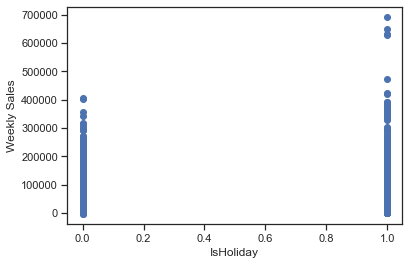

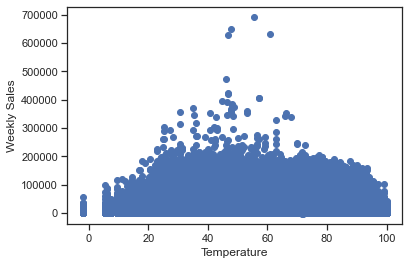

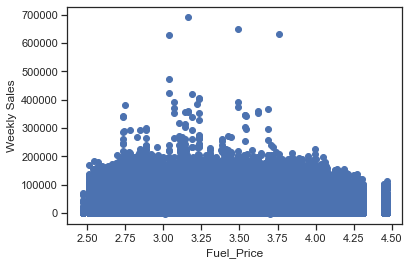

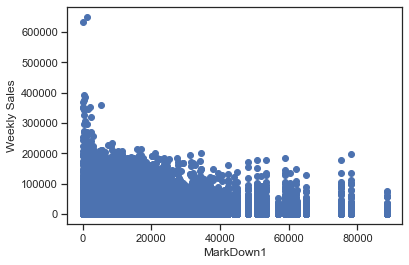

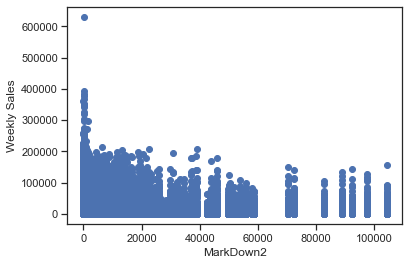

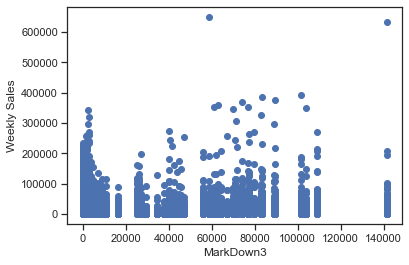

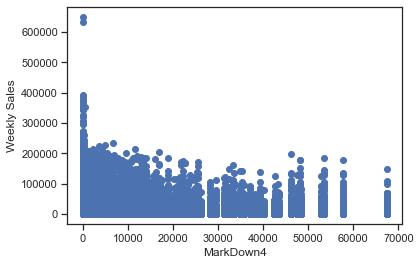

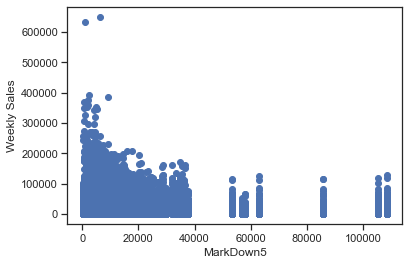

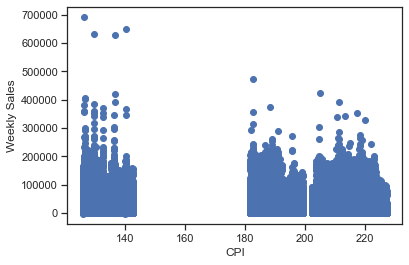

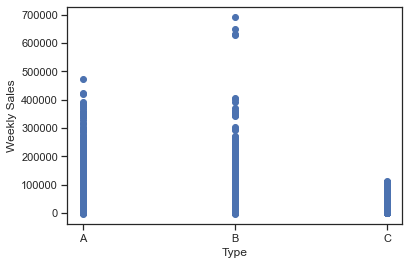

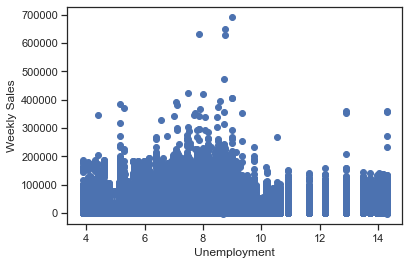

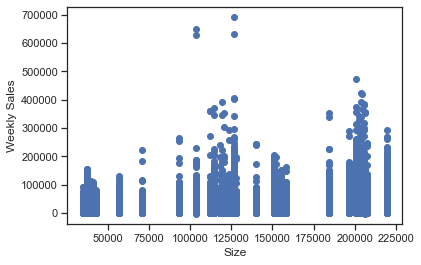

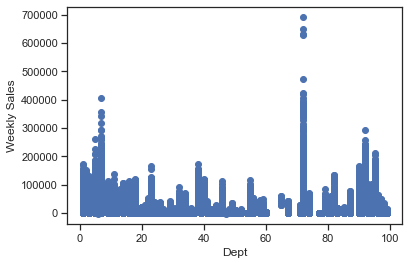

In [13]:
scatter("IsHoliday")
scatter("Temperature")
scatter("Fuel_Price")
scatter("MarkDown1")
scatter("MarkDown2")
scatter("MarkDown3")
scatter("MarkDown4")
scatter("MarkDown5")
scatter("CPI")
scatter("Type")
scatter("Unemployment")
scatter("Size")
scatter("Dept")

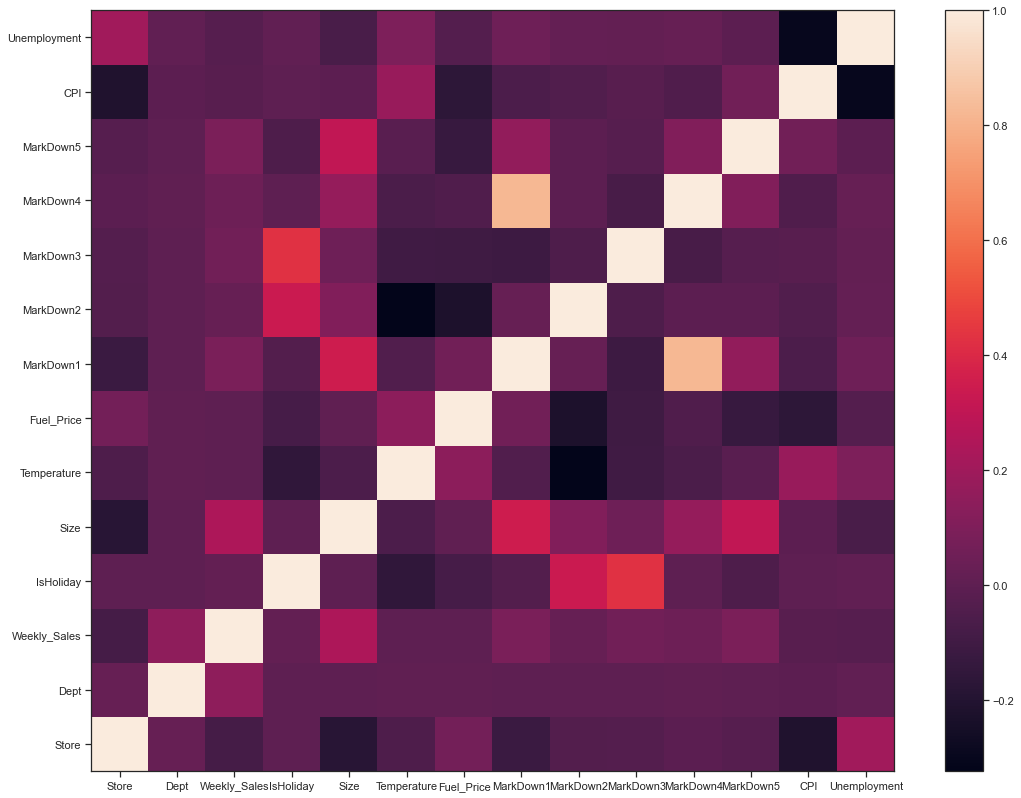

In [14]:
fig = plt.figure(figsize=(18,14))
corr  = dataset.corr() #.corr gets the pairwise correlation
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index);
plt.xticks(np.arange(0.5, len(corr.columns),1), corr.columns);
fig.colorbar(c) #displays the range used in the colorbar

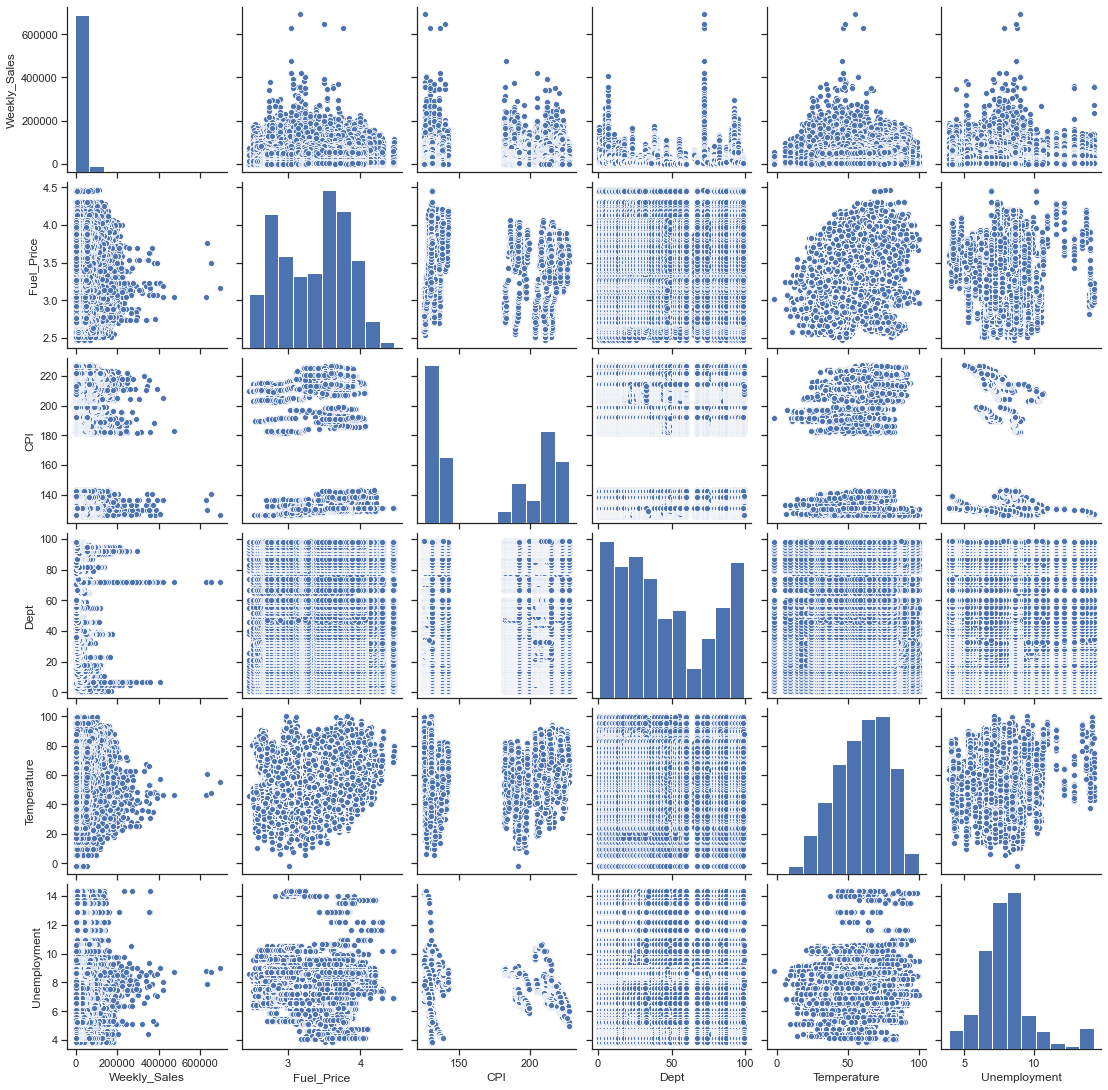

In [15]:
sns.pairplot(dataset, vars=['Weekly_Sales', "Fuel_Price", "CPI", "Dept", "Temperature", 
                            "Unemployment"])

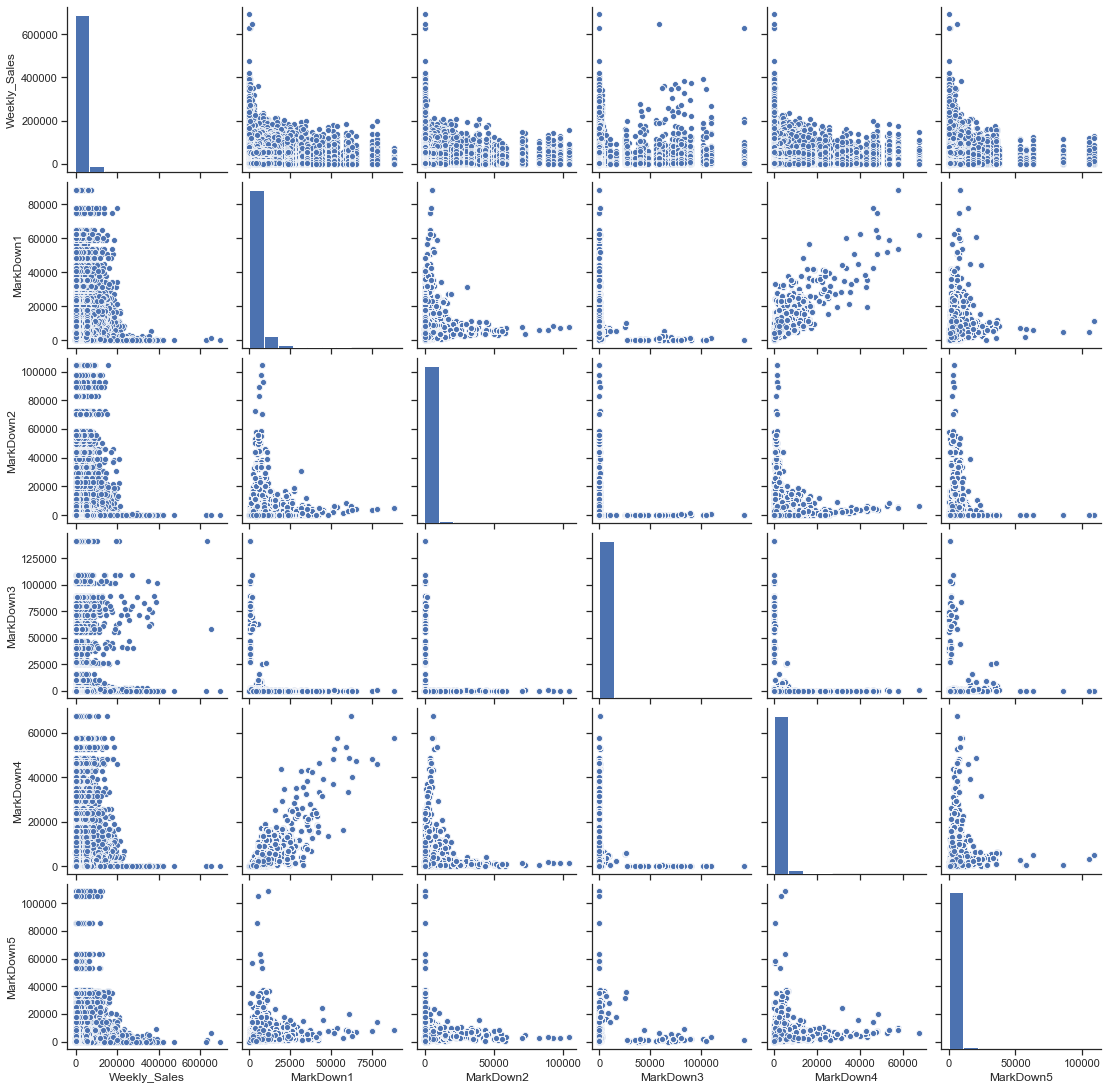

In [16]:
#Seaborn since to have a problem with interpreting datapoints which are N/A
sns.pairplot(dataset.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])


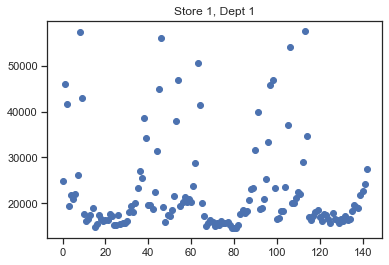

In [17]:
for i, x in dataset.groupby(["Store", "Dept"]):
    plt.title("Store {}, Dept {}".format(i[0],i[1]))
    plt.scatter(range(len(x)), x["Weekly_Sales"])
    plt.show()
    break

### DATASET MANIPULATION

### Identify columns that need to be dummified
### We may need to drop some columns that may be difficult to interpret by the algorithm. (Date is something that is hard to interpret by the algorithm, also Np.Nan)

In [18]:
dataset = pd.get_dummies(dataset, columns=["Type"])

#Np.Nan is difficult to understand by the program
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = \
    dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset = dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
dataset

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
0,1,1,24924.50,False,151315,42.31,0.00,0.00,0.00,0.00,1,0,0,2
1,1,1,46039.49,True,151315,38.51,0.00,0.00,0.00,0.00,1,0,0,2
2,1,1,41595.55,False,151315,39.93,0.00,0.00,0.00,0.00,1,0,0,2
3,1,1,19403.54,False,151315,46.63,0.00,0.00,0.00,0.00,1,0,0,2
4,1,1,21827.90,False,151315,46.50,0.00,0.00,0.00,0.00,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,118221,64.88,4556.61,20.64,1601.01,3288.25,0,1,0,9
421566,45,98,628.10,False,118221,64.89,5046.74,0.00,2253.43,2340.01,0,1,0,10
421567,45,98,1061.02,False,118221,54.47,1956.28,0.00,599.32,3990.54,0,1,0,10
421568,45,98,760.01,False,118221,56.47,2004.02,0.00,437.73,1537.49,0,1,0,10


## ALGORITHMS

In [19]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m
#

In [20]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

## K_Fold Cross Validation

In [21]:
from tqdm import tqdm


In [22]:
kf = KFold(n_splits=5)
split = []

dataset2 = dataset.copy()
for name, group in tqdm(dataset.groupby(["Store", "Dept"])):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 5:
        f = np.array(range(5))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group): #splits to validation fold (train and test)
        group.loc[test_index, 'fold'] = fold #assigning a column to a variable
        fold += 1 #you need this to determine how many folds your dataframe has been trained
    split.append(group)
#         display(split)

100%|█████████████████████████████████████████████████████████████████████████████| 3331/3331 [00:11<00:00, 281.90it/s]


### Selecting the best model

In [23]:
split = pd.concat(split).reset_index(drop=True) #concat makes the list into a df

In [24]:
# models =[extraTreesRegressor(), randomForestRegressor()]
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max

for fold in tqdm(range(5)):
    dataset_train = split.loc[split['fold'] != fold]
    dataset_test = split.loc[split['fold'] == fold]
    train_y = dataset_train["Weekly_Sales"]
    train_x = dataset_train.drop(columns=["Weekly_Sales", "fold"]) #get the features
    test_y = dataset_test["Weekly_Sales"]
    test_x = dataset_test.drop(columns=["Weekly_Sales", "fold"]) #get the features
    print(dataset_train.shape, dataset_test.shape)

    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
#         display(weights)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print("Find Best Model")
        best_error = error
        best_model = model
error_cv /=5

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

(335722, 15) (85552, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.4s finished
 20%|████████████████▊                                                                   | 1/5 [01:38<06:32, 98.22s/it]

0 1949.0360175757583
Find Best Model
(335849, 15) (85425, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished
 40%|█████████████████████████████████▌                                                  | 2/5 [03:14<04:53, 97.70s/it]

1 3891.8371677213004
(335970, 15) (85304, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


2 1611.3924619169334
Find Best Model


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [05:46<03:48, 114.02s/it]

(338733, 15) (82541, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.1s finished
 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [07:16<01:46, 106.66s/it]

3 2452.6284980025107
(338822, 15) (82452, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [08:39<00:00, 103.99s/it]

4 1773.9265922159652


In [25]:
error_cv

2335.764147486493

In [26]:
best_error

1611.3924619169334

In [27]:
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=1, oob_score=False,
                    random_state=None, verbose=1, warm_start=False)

## TEST PART

In [28]:
dataset_test = pd.read_csv('data/walmart/test.csv')
print("----------------------------------------------------------")
print("Size of the Train Dataset: ", df.shape)
features = pd.read_csv('data/walmart/features.csv')
print("----------------------------------------------------------")
print("Size of the Features Dataset: ", features.shape)
stores = pd.read_csv('data/walmart/stores.csv')
print("----------------------------------------------------------")
print("Size of the Features Dataset: ", stores.shape)

----------------------------------------------------------
Size of the Train Dataset:  (421570, 5)
----------------------------------------------------------
Size of the Features Dataset:  (8190, 12)
----------------------------------------------------------
Size of the Features Dataset:  (45, 3)


In [29]:
dataset_test = dataset_test.merge(stores, how="left").merge(features, how='left')
dataset_test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


### Cleaning

In [30]:
dataset_test = pd.get_dummies(dataset_test,columns=["Type"])
dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = \
                dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset_test = dataset_test.fillna(0)

dataset_test["Month"] = pd.to_datetime(dataset_test["Date"]).dt.month

date = dataset_test['Date']

dataset_test = dataset_test.drop(columns=["Date", "CPI", "Fuel_Price", "Unemployment", "MarkDown3"])
dataset_test

,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
0,1,1,False,151315,55.32,6766.44,5147.70,3639.90,2737.42,1,0,0,11
1,1,1,False,151315,61.24,11421.32,3370.89,4646.79,6154.16,1,0,0,11
2,1,1,False,151315,52.92,9696.28,292.10,1133.15,6612.69,1,0,0,11
3,1,1,True,151315,56.23,883.59,4.17,209.91,303.32,1,0,0,11
4,1,1,False,151315,52.34,2460.03,0.00,150.57,6966.34,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,118221,76.05,4842.29,975.03,2449.97,3169.69,0,1,0,6
115060,45,98,False,118221,77.50,9090.48,2268.58,5797.47,1514.93,0,1,0,7
115061,45,98,False,118221,79.37,3789.94,1827.31,744.84,2150.36,0,1,0,7
115062,45,98,False,118221,82.84,2961.49,1047.07,363.00,1059.46,0,1,0,7


In [31]:
predicted_test = best_model.predict(dataset_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.0s finished


In [32]:
predicted_test

array([26268.6022, 19858.5531, 21660.6692, ...,   705.6644,   674.011 ,
         728.4406])

### Displaying the results

Building the dataframe that will consolidate results

In [33]:
dataset_test['Weekly_Sales'] = predicted_test
dataset_test['Date'] = date

#Create ID to associate which stores get which
dataset_test['id'] = dataset_test["Store"].astype(str)+'_'+dataset_test["Dept"].astype(str)+'_'+dataset_test["Date"].astype(str)

dataset_test = dataset_test[['id', 'Weekly_Sales']]


In [34]:
dataset_test.to_csv('retail_analytics.csv')

In [35]:
dataset_test

,id,Weekly_Sales
0,1_1_2012-11-02,26268.6022
1,1_1_2012-11-09,19858.5531
2,1_1_2012-11-16,21660.6692
3,1_1_2012-11-23,21935.4165
4,1_1_2012-11-30,22250.7846
...,...,...
115059,45_98_2013-06-28,697.5178
115060,45_98_2013-07-05,649.7979
115061,45_98_2013-07-12,705.6644
115062,45_98_2013-07-19,674.0110


## TO DO

We have to try the following:
    
      *  Neural Network
      *  SVM  